In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from collections import Counter, OrderedDict

In [2]:
df = pd.read_csv('20180503054542-SurveyExport.csv')
df = df[df.Status == 'Complete']
df

,Response ID,Time Started,Date Submitted,Status,Contact ID,Legacy Comments,Comments,Language,Referer,Extended Referer,...,remarks_proto3,Do you want to evaluate another prototype?.2,PageOrder.2,Prototype 1:final_ranking,Prototype 2:final_ranking,Prototype 3:final_ranking,general_comments,keepinformed_results,contactforadditionalquestions,emailaddress
0,10,"Apr 10, 2018 10:59:02","Apr 10, 2018 11:46:44",Complete,NaN,NaN,Ajay,English,NaN,NaN,...,NaN,Yes,"1,3,4,6",NaN,NaN,NaN,NaN,No,No,NaN
1,11,"Apr 10, 2018 12:15:32","Apr 10, 2018 12:54:00",Complete,NaN,NaN,Vasilis,English,NaN,NaN,...,NaN,NaN,"1,3,4,7,5,6",NaN,NaN,NaN,I guess it would be valuable to have some ques...,Yes,Yes,milias.vasilis@gmail.com
2,12,"Apr 11, 2018 10:30:39","Apr 11, 2018 11:43:33",Complete,NaN,NaN,Harris,English,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,c.valsamos@student.tudelft.nl
4,14,"Apr 11, 2018 14:42:59","Apr 11, 2018 16:59:58",Complete,NaN,NaN,NaN,English,NaN,NaN,...,NaN,Yes,"1,3,4,6",NaN,NaN,NaN,NaN,Yes,Yes,p.omidkhoda@student.tudelft.nl
5,15,"Apr 11, 2018 17:28:45","Apr 11, 2018 17:54:26",Complete,NaN,NaN,NaN,English,NaN,NaN,...,NaN,Yes,"1,3,4,7,6",NaN,NaN,NaN,NaN,No,No,NaN
8,18,"Apr 12, 2018 09:59:57","Apr 12, 2018 10:22:46",Complete,NaN,NaN,NaN,English,NaN,NaN,...,NaN,Yes,"1,3,4,6",NaN,NaN,NaN,NaN,Yes,Yes,gnnspap7@gmail.com
9,19,"Apr 12, 2018 12:49:51","Apr 12, 2018 13:10:28",Complete,NaN,NaN,NaN,English,NaN,NaN,...,I think it would be nice to add an option to c...,Yes,"1,3,4,5,6",NaN,NaN,NaN,NaN,Yes,Yes,e.fregnan@student.tudelft.nl
10,20,"Apr 12, 2018 13:57:51","Apr 12, 2018 14:14:56",Complete,NaN,NaN,NaN,English,NaN,NaN,...,I find this tool much easier than the first on...,Yes,"1,3,4,5,6",NaN,NaN,NaN,NaN,Yes,Yes,d.spadini@sig.eu
20,30,"Apr 14, 2018 22:00:26","Apr 14, 2018 22:53:51",Complete,NaN,NaN,NaN,English,NaN,NaN,...,This prototype basically only shows call graph...,Yes,"1,3,4,7,6",NaN,NaN,NaN,NaN,Yes,Yes,S.Y.vandenOever@student.tudelft.nl
22,37,"Apr 23, 2018 11:43:38","Apr 23, 2018 12:09:07",Complete,NaN,NaN,NaN,English,NaN,NaN,...,NaN,Yes,"1,3,4,6",2.0,1.0,3.0,NaN,Yes,Yes,saberferjani@gmail.com


# General

In [3]:
print('Number of respondants: {}, Complete: {}, Partial: {}'.format(len(df), len(df[df.Status == 'Complete']), len(df[df.Status == 'Partial'])))

Number of respondants: 15, Complete: 15, Partial: 0


# Part 1: Demographics

## Question 1: How long have you been doing the following activities?

In [4]:
def plot_column_distribution(column_name, available_choices):
    results = Counter(df[column_name].fillna('Not answered').value_counts().to_dict())
    merged_results = OrderedDict([(k, results[k]) for k in available_choices])
    transposed_data = list(zip(*merged_results.items()))
    series = pd.Series(transposed_data[1], index=transposed_data[0])
    series.plot.barh()

In [5]:
available_choices_howlong_activities=['Never done it, so far', '1 year or less', '2 years', '3-5 years', '6-10 years', '11 years or more', 'Not answered']

### Professional software development

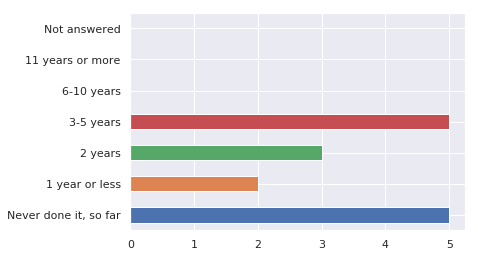

In [6]:
plot_column_distribution(
    column_name='Professional software development:howlong_activities',
    available_choices=available_choices_howlong_activities
)

### Programming

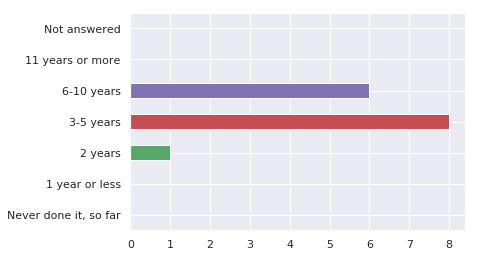

In [7]:
plot_column_distribution(
    column_name='Programming:howlong_activities',
    available_choices=available_choices_howlong_activities
)

## Question 2: How long have you been doing the following activities?

In [8]:
available_choices_howoften_activities=['Never', 'Yearly', 'Monthly', 'Weekly', 'Daily or more often', 'Not answered']

### Programming

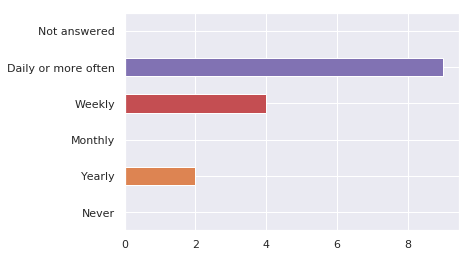

In [9]:
plot_column_distribution(
    column_name='Programming:howoften_activities',
    available_choices=available_choices_howoften_activities
)

### Code reviewing

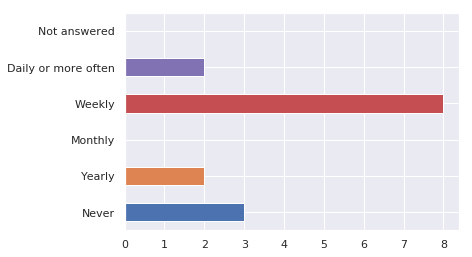

In [10]:
plot_column_distribution(
    column_name='Code reviewing:howoften_activities',
    available_choices=available_choices_howoften_activities
)

## Question 3: what setting do you work in?

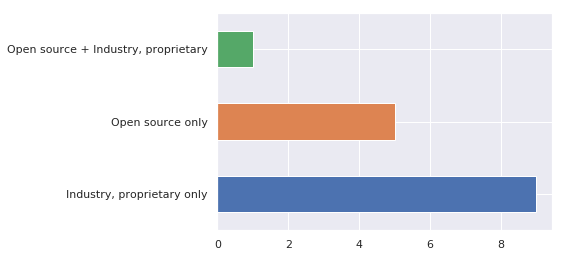

In [11]:
results_setting = df[['Open source:whatsetting', 'Industry, proprietary:whatsetting']].fillna('No').apply(tuple, axis=1).value_counts().to_dict()
mapping_setting = {
    ('Open source', 'Industry, proprietary'): 'Open source + Industry, proprietary',
    ('Open source', 'No'): 'Open source only',
    ('No', 'Industry, proprietary'): 'Industry, proprietary only',
    ('No', 'No'): 'Not answered'
}
results_setting = {mapping_setting[k]: v for k, v in results_setting.items()}
pd.Series(results_setting).plot.barh()

## Question 4: which company do you work for?

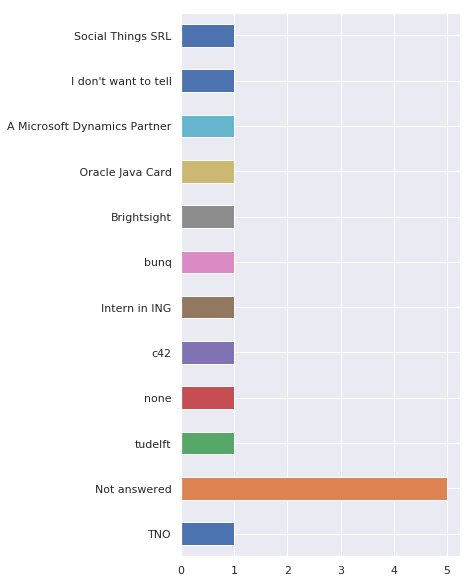

In [12]:
companies = [item for sublist in df['whatcompany'].fillna('Not answered').str.split(';').tolist() for item in sublist]
pd.Series(Counter(companies)).plot.barh(figsize=(5,10))

## Question 5: which open source project do you work on?

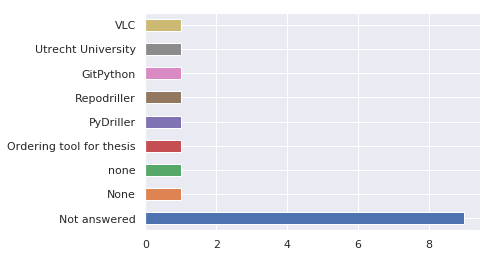

In [13]:
opensourceprojects = [item for sublist in df['whichopensource'].fillna('Not answered').str.split(';').tolist() for item in sublist]
pd.Series(Counter(opensourceprojects)).plot.barh()

## Question 6: which of the following best describes your primary work area?

In [14]:
def plot_checkboxes_distribution(ref_name, options):
    series = df[['{}:{}'.format(option, ref_name) for option in options]].notnull().sum()
    series.index = ([x.split(':')[0] for x in series.index])
    series.plot.barh()

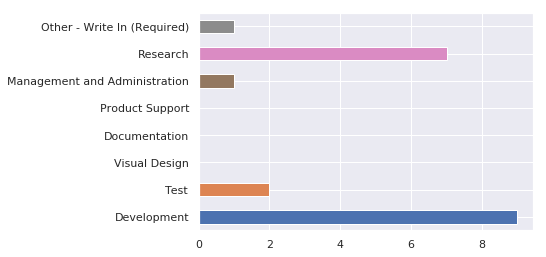

In [15]:
plot_checkboxes_distribution(
    'primaryworkarea',
    ['Development', 'Test', 'Visual Design', 'Documentation', 'Product Support', 'Management and Administration', 'Research', 'Other - Write In (Required)']
)

#### Which are the "other" primary work areas?

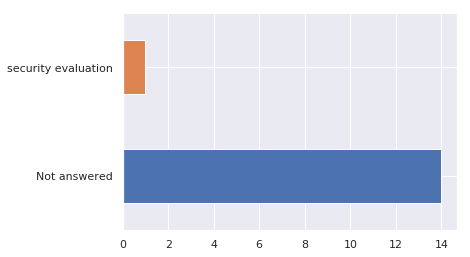

In [16]:
df['Other - Write In (Required):primaryworkarea.1'].fillna('Not answered').value_counts().plot.barh()

## Question 7: how many developers are in your immediate team?

In [17]:
df_howmanydevs = df['howmany_developers'].fillna('Not answered').value_counts()
df_howmanydevs_index = df_howmanydevs.index.to_series()
howmanydevs_newindex = df_howmanydevs_index[df_howmanydevs_index.str.isnumeric().fillna(True)].sort_values().tolist()
howmanydevs_newindex.append('Not answered')
df_howmanydevs.reindex(howmanydevs_newindex).plot.barh()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

## Question 8: which code review tool(s)/environment(s) do you use?

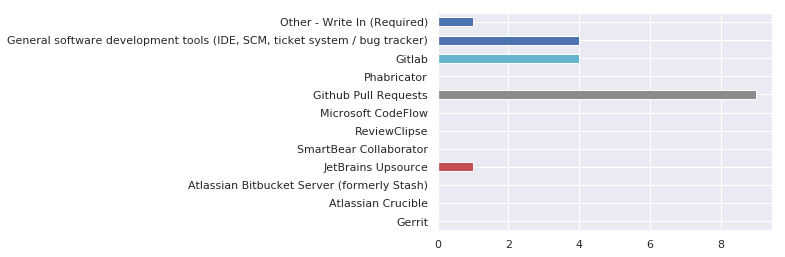

In [18]:
plot_checkboxes_distribution(
    'whichcodereview_tools',
    ['Gerrit', 'Atlassian Crucible', 'Atlassian Bitbucket Server (formerly Stash)', 'JetBrains Upsource',
     'SmartBear Collaborator', 'ReviewClipse', 'Microsoft CodeFlow', 'Github Pull Requests', 'Phabricator',
     'Gitlab', 'General software development tools (IDE, SCM, ticket system / bug tracker)',
     'Other - Write In (Required)']
)

#### Which are the "other" code review tools?

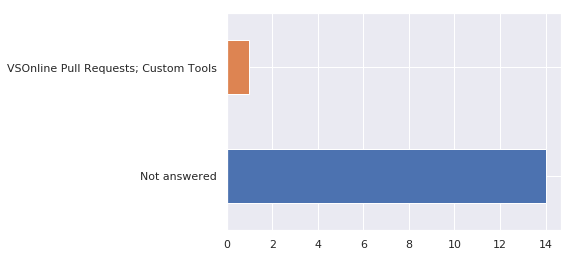

In [19]:
df['Other - Write In (Required):whichcodereview_tools.1'].fillna('Not answered').value_counts().plot.barh()

## Question 9: how satisfied are you with your code review environment?

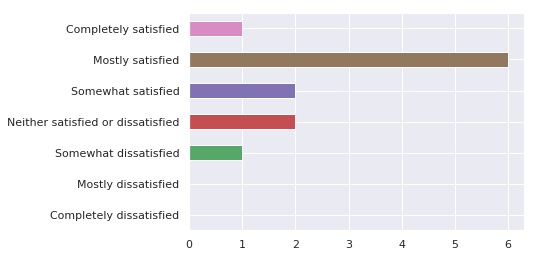

In [20]:
plot_column_distribution(
    column_name='howsatisfied_codereview',
    available_choices=['Completely dissatisfied', 'Mostly dissatisfied', 'Somewhat dissatisfied', 'Neither satisfied or dissatisfied', 'Somewhat satisfied', 'Mostly satisfied', 'Completely satisfied']
)

## Question 10: what are the main reasons why you are not satisfied with your code review tool?

In [21]:
for index, reason in df['What are the main reasons why you are not satisfied with your code review tool?'].dropna().iteritems():
    print(index, reason)

10 - Navigation between files is difficult - The order of the files is alphabetical (that doesn't make sense) - lack of context
20 Big pull requests are hard to grasp; files are typically in alphabetical order and it's difficult to see the structure from a long list of file changes.


# Part 2: prototypes evaluation

## Usability scores

In [22]:
def score_prototypes(row):
    sus_questions = {
        'positive': [
            'I think that I would like to use this tool frequently.',
            'I thought this tool was easy to use.',
            'I found that the various functions in this tool were well integrated.',
            'I would imagine that most people would learn to use this tool very quickly.'
        ],
        'negative': [
            'I think that I would need assistance to be able to use this tool.',
            'I thought there was too much inconsistency in this tool.',
            'I found this tool unnecessarily complex.',
            'I found this tool very cumbersome/awkward to use.'
        ]
    }
    score_mapping = {
        'Strongly Disagree': 0,
        'Disagree': 1,
        'Neither': 2,
        'Agree': 3,
        'Strongly Agree': 4
    }
    scores = {}
    for proto_index in range(1, 4):
        proto_keyword = 'usability_proto{}'.format(proto_index)
        positive_cols = row[['{}:{}'.format(question, proto_keyword) for question in (sus_questions['positive'])]]
        negative_cols = row[['{}:{}'.format(question, proto_keyword) for question in (sus_questions['negative'])]]
        if (positive_cols.isnull().sum() > 0 or negative_cols.isnull().sum() > 0):
            scores[proto_index] = None
            continue
        valid_answers_count = (positive_cols != "I don't know").sum() + (negative_cols != "I don't know").sum()
        positive_score = sum([score_mapping[answer] for answer in positive_cols[positive_cols != "I don't know"].values])
        negative_score = sum([4 - score_mapping[answer] for answer in negative_cols[negative_cols != "I don't know"].values])
        normalized_score = (positive_score + negative_score) * (100 / (valid_answers_count * 4))
        scores[proto_index] = normalized_score
    return tuple([s[1] for s in sorted(scores.items(), key=lambda s: s[0])])

In [23]:
df['score_proto1'], df['score_proto2'], df['score_proto3'] = zip(*df.apply(score_prototypes, axis=1))

In [25]:
df[['score_proto1', 'score_proto2', 'score_proto3']].astype('float')

,score_proto1,score_proto2,score_proto3
0,96.875000,65.625000,78.125
1,71.875000,75.000000,78.125
2,56.250000,NaN,NaN
4,84.375000,59.375000,78.125
5,100.000000,71.428571,12.500
8,46.875000,78.125000,81.250
9,53.125000,71.875000,93.750
10,46.875000,40.625000,68.750
20,65.625000,81.250000,50.000
22,62.500000,81.250000,71.875


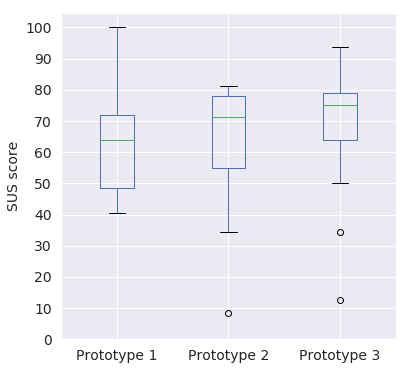

In [74]:
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.rc('axes',labelsize=14)
ch = df[['score_proto1', 'score_proto2', 'score_proto3']].astype('float').boxplot(figsize=(6,6))
ch.set_ylabel('SUS score')
ch.set_yticks(np.arange(0, 101, 10))
ch.set_xticklabels(['Prototype 1', 'Prototype 2', 'Prototype 3'])
plt.savefig('/home/joined/Desktop/selection_sus.png', dpi=300, bbox_inches='tight')

## Comments

In [75]:
for i in range(1, 4):
    for index, item in df['remarks_proto{}'.format(i)].dropna().iteritems():
        print('Prototype number: {}, Index: {}, Comment: {}'.format(i, index, item))

Prototype number: 1, Index: 2, Comment: It's really useful to have the change details in case there are a lot of changes that are hard to keep track of in the overview window.
Prototype number: 1, Index: 5, Comment: Already want to try this one :)
Prototype number: 1, Index: 10, Comment: The prototype is too complex. When reviewing, what I would like to see is old code, new code. That's it. All the fancy information (like filter by added lines, or the structure of code) are not my primary: the code is. So even though it could be useful to have this kind of information, presenting them in the first page it's not a good idea IMHO.
Prototype number: 1, Index: 20, Comment: The tool looks complex, but contains a lot of valuable info
Prototype number: 1, Index: 52, Comment: The main advantage that I see of using the tool is that you can get a complete overview of all the elements that have been touched grouped by type/level, which you don't see directly when using diffs.
Prototype number: 1,

## Part 3: ranking

In [27]:
ranking_columns = ['Prototype {}:final_ranking'.format(i) for i in range(1, 4)]
df.dropna(subset=ranking_columns)[ranking_columns].astype('int')

,Prototype 1:final_ranking,Prototype 2:final_ranking,Prototype 3:final_ranking
22,2,1,3
44,1,2,3
52,1,3,2
76,1,2,3
79,2,1,3


# Part 4: final remarks

In [28]:
for index, item in df['general_comments'].dropna().iteritems():
    print(index, item)

1 I guess it would be valuable to have some questions in the end (after I have seen all the prototypes) to bee able to actually compare them, and answer the questions after I have seen everything.
62 Why was I supposed to review prototypes? I though this survey was about code reviews.
